In [4]:
##############################################
# Programmer: Matthew Moore
# Class: CptS 322-01, Spring 2022
# Programming Assignment #4
# 3/3/2022
# 
# 
# Description: This program runs through all of the visualizations for the assignment. The purpose of the file is
# to test the predictive accuracy of all of the classification methods we build in the myclassifiers.py class file. 
##############################################
import importlib
import os
import numpy as np

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
import mysklearn.myevaluation as myeval
import mysklearn.mysimplelinearregressor
from mysklearn.mysimplelinearregressor import MySimpleLinearRegressor
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MySimpleLinearRegressionClassifier,MyKNeighborsClassifier,\
    MyDummyClassifier, MyDecisionTreeClassifier, \
    MyNaiveBayesClassifier, MyRandomForestClassifier

# NCAA Basketball March Madness Tournament Predictor
#### By Matt Moore and Ben Higley

## Introduction

Team placement in the NCAA March Madness tournament is one of the most difficult outcomes to predict out of anything. Ben and I set out a mission to utilize our machine learning classifiers to get as close as possible to predicting the perfect bracket. We used a comprehensive data set from 2008-2022 of all March Madness team results as well as team statistics for that given season for from Barttovik.com, which we confirmed were accurate numbers. By training on this dataset, we were able to make relatively strong predictions (accuracy of 80%) on what round a given team would get to based on their seasonal statistics.

In [5]:
importlib.reload(np)
importlib.reload(os)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myclassifiers)
importlib.reload(mysklearn.myevaluation)
np.random.seed(0)

fname = os.path.join("input_data", "cbb.csv")
bball_table = MyPyTable()
bball_table.load_from_file(fname)

fname = os.path.join("input_data", "cbb2022.csv")
bball_table_test = MyPyTable()
bball_table_test.load_from_file(fname)
# stats_header = ['ADJOD','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD',\
    # 'ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']

stats_header = ['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD',\
    'DRB','FTR','3P_O','3P_D','ADJ_T','WAB']

stats_cols = []
stats_cols_inner = []
stats_col = []
for stat in stats_header:
    stats_col.append(myutils.discretize(myutils.normalize(bball_table_test.get_column(stat))))
stats_col.append(bball_table_test.get_column('SEED'))

for index in range(len(bball_table_test.data)):
    for stat_col in stats_col:
        stats_cols_inner.append(stat_col[index])
    stats_cols.append(stats_cols_inner)
    stats_cols_inner = []

X_test = stats_cols.copy()
stats_cols = []
stats_col = []
# Grabbing all the rows we want to use
for stat in stats_header:
    stats_col.append(myutils.discretize(myutils.normalize(bball_table.get_column(stat))))
stats_col.append(bball_table.get_column('SEED'))

# Creating a new table with the rows based on the appropriate columns
for index in range(len(bball_table.data)):
    for stat_col in stats_col:
        stats_cols_inner.append(stat_col[index])
    stats_cols.append(stats_cols_inner)
    stats_cols_inner = []

y_train_bball = [val for val in bball_table.get_column('POSTSEASON')]
X_train_bball = stats_cols.copy()

## Exploratory Data Analysis

Below, we utilize a few graphs to summarize our the class label as well as some of the attributes we intend to use. 

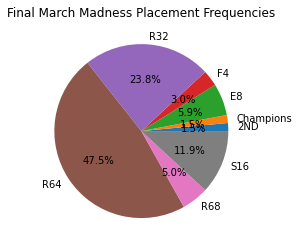

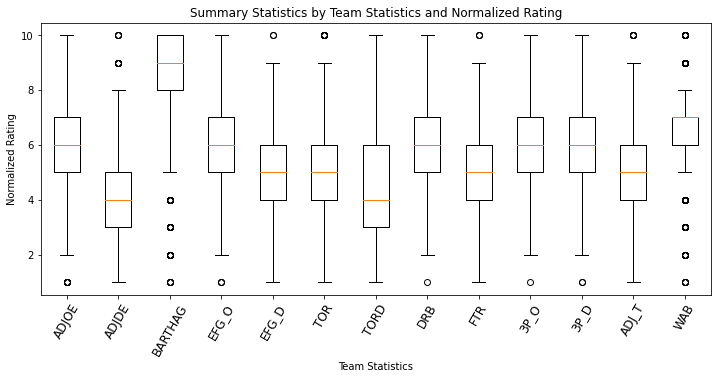

In [20]:
importlib.reload(mysklearn.myutils)
import matplotlib.pyplot as plt
placement_values, placement_freqs = myutils.get_frequencies(y_train_bball,['POSTSEASON'],'POSTSEASON')
plt.figure()
plt.pie(placement_freqs,labels=placement_values,autopct="%1.1f%%")
plt.title("Final March Madness Placement Frequencies")
plt.show()
myutils.build_box_plot("Summary Statistics",'Team Statistics','Normalized Rating',stats_col[:-1],stats_header)

In [ ]:
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myclassifiers)
importlib.reload(mysklearn.mysimplelinearregressor)
# RQ5 (fake) iPhone purchases dataset
iphone_col_names = ["standing", "job_status", "credit_rating", "buys_iphone"]
X_train_iphone = [
    [1, 3, "fair"],
    [1, 3, "excellent"],
    [2, 3, "fair"],
    [2, 2, "fair"],
    [2, 1, "fair"],
    [2, 1, "excellent"],
    [2, 1, "excellent"],
    [1, 2, "fair"],
    [1, 1, "fair"],
    [2, 2, "fair"],
    [1, 2, "excellent"],
    [2, 2, "excellent"],
    [2, 3, "fair"],
    [2, 2, "excellent"],
    [2, 3, "fair"]
]

y_train_iphone = ["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no","yes"]
my_tree = MyDecisionTreeClassifier()
my_tree.fit(X_train_iphone,y_train_iphone)
print(my_tree.tree)

['Attribute', 'att0', ['Value', 1, ['Attribute', 'att1', ['Value', 1, ['Leaf', 'yes', 1, 5]], ['Value', 2, ['Attribute', 'att2', ['Value', 'excellent', ['Leaf', 'yes', 1, 2]], ['Value', 'fair', ['Leaf', 'no', 1, 2]]]], ['Value', 3, ['Leaf', 'no', 2, 5]]]], ['Value', 2, ['Attribute', 'att2', ['Value', 'excellent', ['Leaf', 'no', 4, 10]], ['Value', 'fair', ['Leaf', 'yes', 6, 10]]]]]
